## EAS 503 Homework 2 Submission
Name - Yujia Lian

Problem 2 discussed with Mingda Jia

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 17, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (10 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

A primary account is the main account to which multiple sup-cards are linked. The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. Assume that each sup-card has the same individual credit limit as the primary credit card. Any transaction over the permitted account credit limit must be denied i.e. if the total account balance exceeds the credit limit on the primary account, any transaction, on all the cards linked to the account (primary or sup-card), will be denied.

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

In [581]:

class PrimaryCard:
    Balance = 0
    def __init__(self, Card_ID, Card_Number, Account_Number, Primary_or_Sub, Account_Limit, Current_Balance_within_card):
        self.__Card_ID = Card_ID
        self.__Card_Number = Card_Number
        self.__Account_Number = Account_Number
        self.__Account_Limit = Account_Limit
        self.__Primary_or_Sub = Primary_or_Sub
        self.__Current_Balance_within_Primary_card = Current_Balance_within_card
        self.Balance = Current_Balance_within_card
        
    def Get_Primary_or_Sub(self):
        return self.__Primary_or_Sub
    def Get_Account_Number(self):
        return self.__Account_Number
    def Set_Account_Balance(self, sub_balance):
        self.Balance = self.Balance + sub_balance
        
    #Getter and Setter for the account balance
    def Get_Account_Balance(self):
        return self.Balance
    def Get_Account_Limit(self):
        return self.__Account_Limit
    
    #Getter and setter for the card balance
    def Set_Card_Balance(self, deposit):
        self.__Current_Balance_within_Primary_card = self.__Current_Balance_within_Primary_card + deposit
    def Get_Card_Balance(self, deposit):
        return self.__Current_Balance_within_Primary_card
    
    #Deposit the money into bank account
    def Transactions(self, money):
        Balance = self.Get_Account_Balance() + money
        if Balance > self.Get_Account_Limit():
            print("You reach this month's deposit upper limit for account: ", self.Get_Account_Number())
            return
        self.Set_Account_Balance(money)
        self.Set_Card_Balance(money)

In [582]:

class SupplementaryCard:
    def __init__(self, Card_ID, Card_Number, Account_Number, Primary_or_Sub, Card_Limit, Current_Balance_within_Sub_card,
                 Father_Card):
        self.__Card_ID = Card_ID
        self.__Sub_Card_Number = Card_Number
        self.__Sub_Account_Number = Account_Number
        self.__Primary_or_Sub = Primary_or_Sub
        self.__Card_Limit = Card_Limit
        self.__Current_Balance_within_Sub_card = Current_Balance_within_Sub_card
        self.__Father_card = Father_Card
        
    #Get card information
    def Get_Primary_or_Sub(self):
        return self.__Primary_or_Sub
    def Get_Account_Number(self):
        return self.__Sub_Account_Number
    
    #Getter and setter for the account limit
    def Get_Account_Limit(self):
        return self.__Card_Limit
    
    #Getter and seter for account balance
    def Get_Account_Balance(self):
        return self.__Father_card.Get_Account_Balance()
    def Set_Account_Balance(self, deposit):
        self.__Father_card.Set_Account_Balance(deposit)
        
    #Getter and setter for the card balance
    def Set_Card_Balance(self,money):
        self.__Current_Balance_within_Sub_card =self.__Current_Balance_within_Sub_card + money
        
    def Get_Card_Balance(self):
        return self.__Current_Balance_within_Sub_card
    
    #Deposit
    def Transactions(self, money):
        total_balance = self.Get_Account_Balance() + money
        if total_balance > self.Get_Account_Limit():
            print("You excess the account limit for this account!", self.Get_Account_Number())
            return
        else:
            self.Set_Account_Balance(money)
            self.Set_Card_Balance(money)
        

You excess the account limit for this account! 4952
You reach this month's deposit upper limit for account:  4952
You excess the account limit for this account! 4952
You reach this month's deposit upper limit for account:  4952
You excess the account limit for this account! 4952
You excess the account limit for this account! 4952
You excess the account limit for this account! 4952
You excess the account limit for this account! 4952
You reach this month's deposit upper limit for account:  4952
You reach this month's deposit upper limit for account:  4952
You excess the account limit for this account! 4952
You reach this month's deposit upper limit for account:  4952
You excess the account limit for this account! 4952
You excess the account limit for this account! 4952
You excess the account limit for this account! 4952
You excess the account limit for this account! 4952


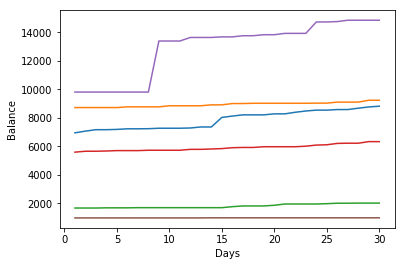

In [583]:
import matplotlib.pyplot as plt
import numpy as np
primary_accounts = {}
accounts = {}
Accounts_Details = np.genfromtxt('./Account_details.txt', dtype=None, names=('ID','Card_Number', 'Account_Number', 'Primary_Sub', 'Card_Limit', 'Current_balance'),delimiter='\t', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True)
for ID in Accounts_Details['ID']:
    if Accounts_Details['Primary_Sub'][ID-1] == b'P':
        primary_account = PrimaryCard(Accounts_Details['ID'][ID-1], Accounts_Details['Card_Number'][ID-1], Accounts_Details['Account_Number'][ID-1], 'P', Accounts_Details['Card_Limit'][ID-1], Accounts_Details['Current_balance'][ID-1])
        primary_accounts[primary_account.Get_Account_Number()] = primary_account
        accounts[ID] = primary_account
for ID in Accounts_Details['ID']:
    if Accounts_Details['Primary_Sub'][ID-1] == b'S':
        Account_Number = Accounts_Details['Account_Number'][ID-1]
        Primary_Card = primary_accounts[Account_Number]
        accounts[ID] = SupplementaryCard(Accounts_Details['ID'][ID-1], Accounts_Details['Card_Number'][ID-1], Accounts_Details['Account_Number'][ID-1], 'S', Accounts_Details['Card_Limit'][ID-1], Accounts_Details['Current_balance'][ID-1],Primary_Card)
        accounts[ID].Set_Account_Balance(accounts[ID].Get_Card_Balance())

transaction = np.genfromtxt('./transaction.txt', dtype=None, names=('ID','Transaction_Amount', 'Date'),
                            delimiter='\t', skip_header=1, usecols=(0,1,2), unpack=True)
record_date = {}
for record in transaction:
    finish_date = record['Date']
    if record['Date'] not in record_date.keys():
        record_date[record['Date']] = 1
    else:
        record_date[record['Date']] = record_date[record['Date']] + 1
List_Of_Lists = []
Current_List = []
for record in transaction:
    if record_date[record['Date']] != 0:
        accounts[record['ID']].Transactions(record['Transaction_Amount'])
        record_date[record['Date']] = record_date[record['Date']] - 1
    if record_date[record['Date']] == 0:
        for i in range(1, len(accounts) + 1):
            if accounts[i].Get_Primary_or_Sub() == 'P':
                Current_List.append(accounts[i].Get_Account_Balance())
        List_Of_Lists.append(Current_List)
        Current_List = []

for i in range(len(List_Of_Lists[0])):
    current_account_balance = []
    for j in range(len(List_Of_Lists)):
        current_account_balance.append(List_Of_Lists[j][i])
    current_account_balance = np.asarray(current_account_balance)
    days = np.arange(1,31)
    plt.plot(days, current_account_balance, )
    plt.xlabel('Days')
    plt.ylabel('Balance')
plt.show()

### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$4x^3 + 3x^2 + 7 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^2 -7x +3=0$
2. $x^3 -8x +5=0$
3. Consider the following three polynomials: $f(x)=x,$ $g(x)=x^2$ and $p(x)=9x^2 +2$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

In [584]:
#Enter your solution here
import numpy as np
import math
class Monomials:
    def __init__(self, coefficient, power):
        self.coefficient = coefficient
        self.power = power
        
    def value(self, x):
        return self.coefficient * math.pow(int(x),int(self.power))
    
    def __add__(self, other):
        vector = other.vector
        vector.append(Monomials(self.coefficient,self.power))
        return Polynomial(vector)
    
    def __mul__(self, other):
        if(other.__class__.__name__ == 'Polynomial'):
            for i in other.vector:
                i.coefficient = i.coefficient * self.coefficient
                i.power = i.power + self.power
            return other
        
        else:
            self.coefficient = self.coefficient * other.coefficient
            self.power = self.power + other.power
            return self

In [585]:
import numpy as np
class Polynomial:
    def __init__(self, formula):
        self.vector = formula

    def  __add__(self,other):
        temp = self.vector + other.vector
        return Polynomial(temp)

    
    def __mul__(self,other):
        temp = []
        for i in self.vector:
            for j in other.vector:
                temp.append(terms(i.coefficient * j.coefficient, i.power + j.power))
        return Polynomial(temp)
    def solve(self):
        if(self.order() > 2):
            raise NameError("Only solve quadratic polynomials! invalid for higher order polynomials!!!")
        else:
            self.Simplification()
            for i in self.vector:
                if(i.power == 2):
                    two = i.coefficient
                if(i.power == 1):
                    one = i.coefficient
                if(i.power == 0):
                    zero = i.coefficient
            if(not one):
                one = 0
            if(not zero):
                zero = 0
            print(two,one,zero)
            return np.roots([two, one, zero])
        
    def order(self):
        ord = 0
        for i in self.vector:
            if(i.power > ord):
                ord = i.power
        return ord
    def Simplification(self):
        order = {}
        for i in self.vector:
            try:
                order[i.power].append(i)
            except KeyError:
                order[i.power] = [i]
        for i in order.values():
            for j in range(len(i)-1):
                i[j+1].coefficient += i[j].coefficient
                i.pop(j)
        vector = []
        for i in order.values():
            vector.append(i[0])
        self.vector = vector
    def value(self,x):
        val = 0
        for i in self.vector:
            val += i.value(x)
        return val

In [586]:
import matplotlib.pyplot as plt
%matplotlib inline 
def plot(P):
    x = np.arange(-10, 10, 1)
    y = []
    for i in x:
        y.append(P.value(i))
    plt.plot(x,y)

In [587]:
import re
def Find(item):
    Number_Only = re.match(r'^(\+|\-)\d*$', item, flags = 0)
    Begin_Number = re.match(r'^\d*$', item, flags = 0)
    if(Number_Only):
        coefficient = Number_Only.group()
        if('-' in coefficient):
            coefficients = 0-int(coefficient[1:])
        elif('+' in coefficient):
            coefficients = int(coefficient[1:])
        power = 0
        term = terms(coefficients, power)
        return term
    elif(Begin_Number):
        coefficient = int(Begin_Number.group())
        power = 0
        return terms(coefficient, power)
    else:
        S_Coefficient = re.match(r'^.\d*(?=x)', item, flags = 0)
        S_Power = re.search(r'(?<=x)\d*.$', item, flags = 0)
        if(S_Coefficient):
            if('-' in S_Coefficient.group()):
                coefficient = 0-float(S_Coefficient.group()[1:])
            elif('+' in S_Coefficient.group()):
                coefficient = float(S_Coefficient.group()[1:])
            else:
                coefficient = float(S_Coefficient.group())
        else:
            coefficient = 1
        if(S_Power):
            if('-' in S_Power.group()):
                power = 0-float(S_Power.group())
            else:
                power = float(S_Power.group())
        else:
            power = 1
        term = terms(coefficient, power)
        return term

In [588]:
def Formula(formula):
    items = formula.split(' ')
    f = []
    for i in items:
        f.append(Find(i))
    return Polynomial(f)

In [589]:
#Problem 1
f1 = Formula('x2 -7x +3')
f1.solve()

1 -7.0 3


array([ 6.54138127,  0.45861873])

In [590]:
#Problem 2
f1 = Formula('x3 -8x +5')
f1.solve()

NameError: Only solve quadratic polynomials! invalid for higher order polynomials!!!

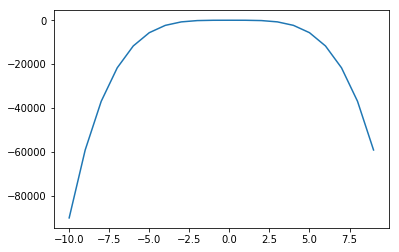

In [591]:
#Problem 3.
fx = readformula('x')
gx = readformula('x2')
px = readformula('9x2 +2')
minus = Monomials(-1,0)
results = fx.__add__(minus.__mul__(gx.__mul__(px)))
plot(results)

### Problem 3 - Random Walk (15 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a unit step in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (1,0), (-1,0), (0,1) or (0,-1) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-4,-4), (-4,4), (4,4), (4,-4). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

In [592]:
#Enter your solution here
import numpy as np
class Walker:
    Position = (0,0)
    Direction = {}
    Path = [(0,0)]
    #Path = []
    def __init__(self, position):
        self.Direction[1] = (1, 0)
        self.Direction[2] = (-1, 0)
        self.Direction[3] = (0, 1)
        self.Direction[4] = (0, -1)
        self.Position = position
    def getDirection(self):
        Next_Direction = np.random.randint(1, 5)
        direction = self.Direction[Next_Direction]
        return direction
    def walk(self):
        next_step = self.getDirection()
        newX = self.Position[0] + next_step[0]
        newY = self.Position[1] + next_step[1]
        self.Position = (newX, newY)
        self.Path.append(self.Position)
    def Get_Path(self):
        return self.Path
    def Get_Steps(self):
        return len(self.Path)
    def Get_Position(self):
        return self.Position

The  1 th trail takes  40  steps.
The  2 th trail takes  52  steps.
The  3 th trail takes  14  steps.
The  4 th trail takes  31  steps.
The  5 th trail takes  17  steps.
The average steps are:  30.8  steps.


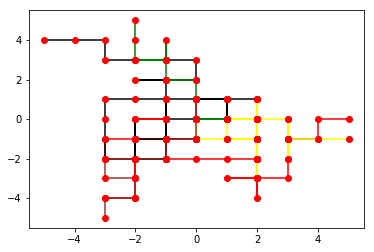

In [593]:
import matplotlib.pyplot as plt
steps = []
tuple_List = []
for i in range(0,5):
    start = (0, 0)
    my_walker = Walker(start)
    my_walker.Path = [(0,0)]
    Walking = True
    while(Walking):
        if(
            my_walker.Get_Position()[0] < -4 or
            my_walker.Get_Position()[0] > 4  or
            my_walker.Get_Position()[1] > 4  or
            my_walker.Get_Position()[1] < -4
        ):
            steps.append(my_walker.Get_Steps())
            tuple_List.append(my_walker.Get_Path())
            Walking = False
            break
        my_walker.walk()
totalSteps = 0
for i in range(len(steps)):
    totalSteps += steps[i]
    print("The ", i+1, "th trail takes ", steps[i], " steps.")
AverageSteps = totalSteps / 5

print("The average steps are: ", AverageSteps, " steps.")
color = ['red', 'black', 'green', 'yellow', 'brown']
for i in range(len(tuple_List)):
    #print(i)
    current_tuple = tuple_List[i]
    x_val = [x[0] for x in current_tuple]
    y_val = [x[1] for x in current_tuple]
    plt.plot(x_val,y_val, color = color[i])
    plt.plot(x_val, y_val, 'or')
plt.show()

### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from an _exponential distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is exponential distribution. Call this function ``inverseCDFExponential()``. Note that you are not allowed to use any routines from ``np.random`` package here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\lambda$.
3. Apply the ``inverseCDFExponential()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

Using the above implementation, generate a sample of size 100 from an  Exponential ($\lambda=4$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

In [594]:
#Enter your solution here
import numpy as py
import random
sample = np.random.uniform(0,1,100)
def inverseCOFExponential(sample, lam):
    y = -np.log(1-sample)/lam
    return y

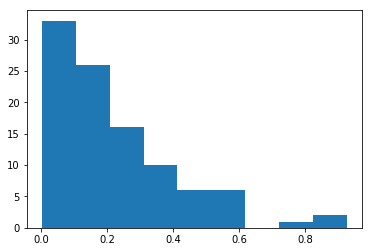

Y mean =  0.224071537361
Y variable =  0.0365437231092


In [595]:
import matplotlib.pyplot as plt
y_exponential = inverseCOFExponential(sample, 4)
plt.hist(y_exponential, bins = "auto")
plt.show()
print("Y mean = ", np.mean(y_exponential))
print("Y variable = ", np.var(y_exponential))